In [685]:
import warnings
warnings.filterwarnings('ignore')

In [686]:
import pandas as pd
import math as mt
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense,LSTM,Dropout,Activation
from tensorflow.keras.models import Sequential

In [837]:
stocks=pd.read_csv("C:/Users/djroc/OneDrive/Desktop/GOOGl.csv")

In [838]:
stocks.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-05-28,442.192200,446.516510,440.640656,441.076080,441.076080,4510485
1,2013-05-29,438.293304,439.434448,432.577576,434.589600,434.589600,4022773
2,2013-05-30,435.395386,439.889893,433.638641,435.815826,435.815826,4237159
3,2013-05-31,434.494507,438.938934,434.194183,436.046051,436.046051,3934861
4,2013-06-03,436.936951,437.422424,427.937927,434.249237,434.249237,4946449


In [839]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2016 non-null   object 
 1   Open       2016 non-null   float64
 2   High       2016 non-null   float64
 3   Low        2016 non-null   float64
 4   Close      2016 non-null   float64
 5   Adj Close  2016 non-null   float64
 6   Volume     2016 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.4+ KB


In [840]:
stocks.shape

(2016, 7)

In [841]:
df=stocks.copy()

In [842]:
stocks['Date']=pd.to_datetime(stocks['Date'])
stocks.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

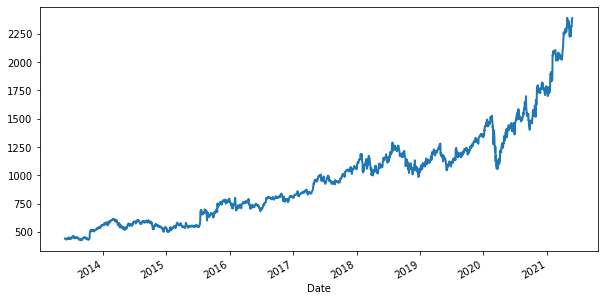

In [844]:
stocks['Open'].plot(figsize=(10,5),linewidth=2)

<AxesSubplot:xlabel='Date'>

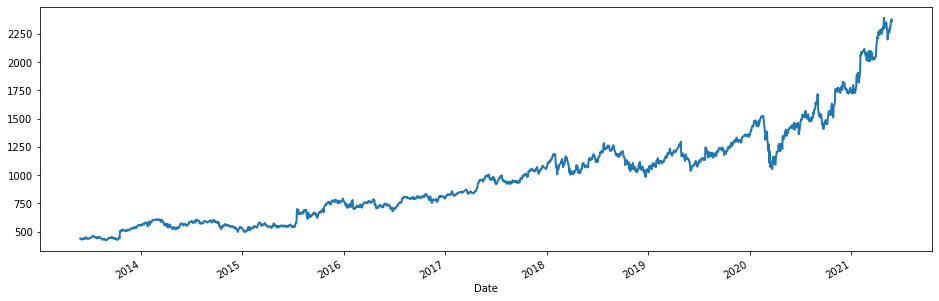

In [845]:
stocks['Close'].plot(figsize=(16,5),linewidth=2)

<AxesSubplot:xlabel='Date'>

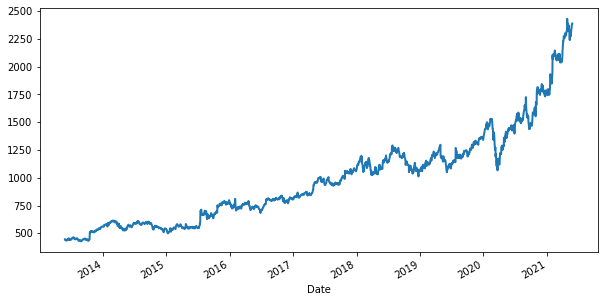

In [846]:
stocks['High'].plot(figsize=(10,5),linewidth=2)

<AxesSubplot:xlabel='Date'>

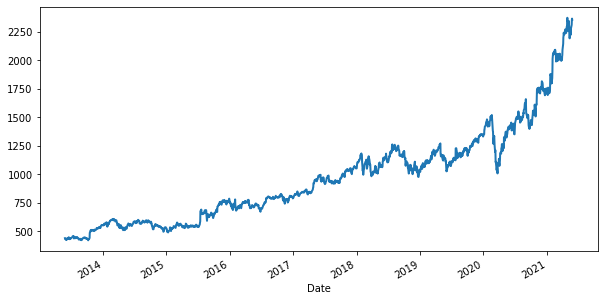

In [847]:
stocks['Low'].plot(figsize=(10,5),linewidth=2)

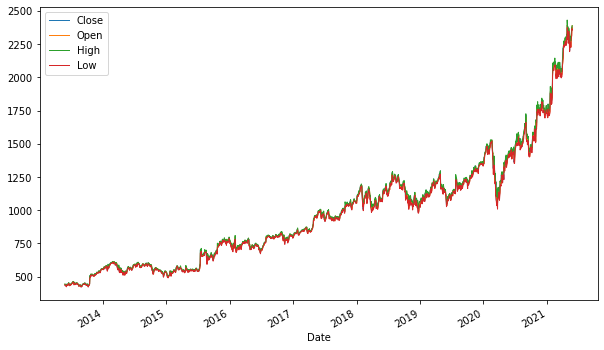

In [848]:
stocks['Close'].plot(figsize=(10,6),linewidth=1)
stocks['Open'].plot(figsize=(10,6),linewidth=1)
stocks['High'].plot(figsize=(10,6),linewidth=1)
stocks['Low'].plot(figsize=(10,6),linewidth=1)
plt.legend(['Close','Open','High','Low'])

In [849]:
plt.figure(figsize=(11,11)) 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed_stocks=seasonal_decompose(stocks.Close,period=365,model='additive')

<Figure size 792x792 with 0 Axes>

<AxesSubplot:xlabel='Date'>

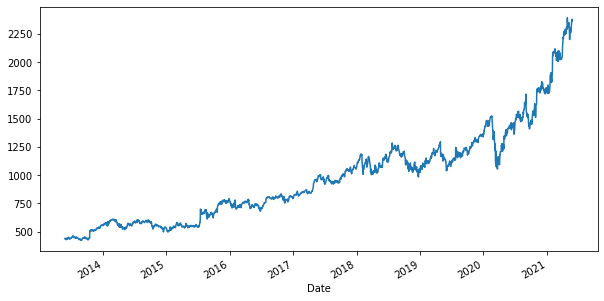

In [850]:
decomposed_stocks.observed.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

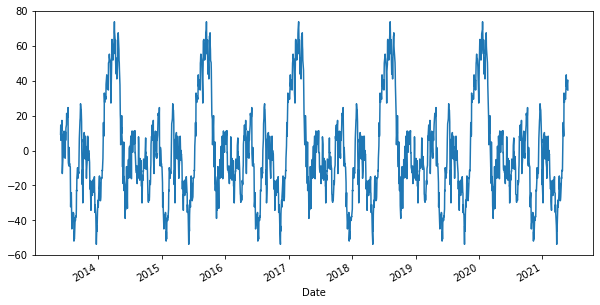

In [851]:
decomposed_stocks.seasonal.plot(figsize=(10,5))

<AxesSubplot:xlabel='Date'>

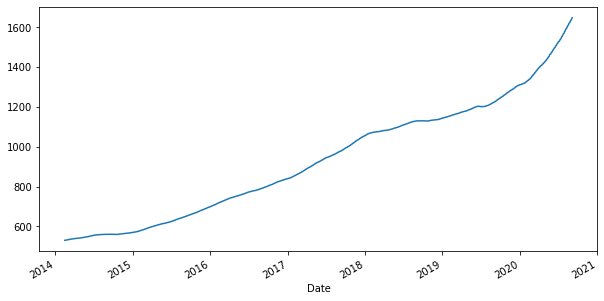

In [852]:
decomposed_stocks.trend.plot(figsize=(10,5))

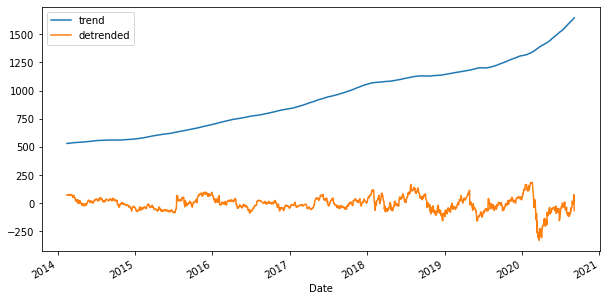

In [853]:
decomposed_stocks.trend.plot(figsize=(10,5))
detrended_stocks=stocks.Close.values-decomposed_stocks.trend
detrended_stocks.plot(figsize=(10,5))
plt.legend(['trend','detrended'])

<AxesSubplot:xlabel='Date'>

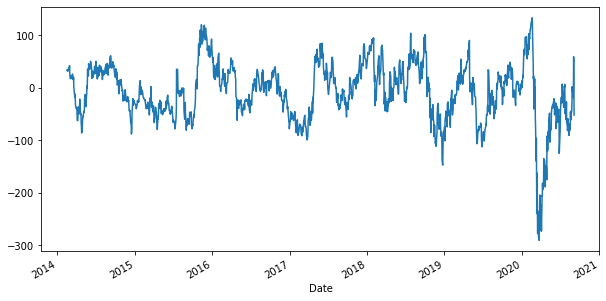

In [854]:
decomposed_stocks.resid.plot(figsize=(10,5))

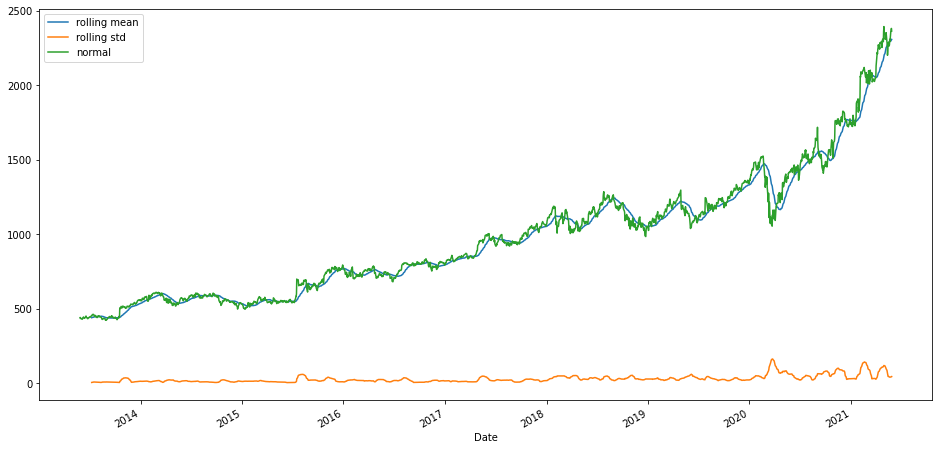

In [855]:
#seems to be an upward trend
#std seems to be nearly constant
#mean is not constant
#infer that not stationary
stocks.Close.rolling(30).mean().plot(figsize=(16,8))
stocks.Close.rolling(30).std().plot(figsize=(16,8))
stocks.Close.plot(figsize=(16,8))
plt.legend(['rolling mean','rolling std','normal'])

In [856]:
stocks.corr()['Close']

Open         0.999468
High         0.999727
Low          0.999761
Close        1.000000
Adj Close    1.000000
Volume      -0.280351
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

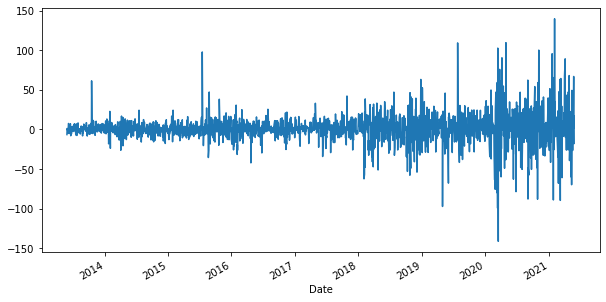

In [857]:
#Making it stationary
stocks.Close.diff().plot(figsize=(10,5))

In [858]:
#ts_log_diff =stocks-stocks.shift()
#plt.plot(ts_log_diff['Open'])

In [859]:
#ts_log_diff

In [171]:
#import plotly.graph_objects as go
#import chart_studio.plotly as py
#trace=go.Candlestick(x=stocks.index,
 #               open=stocks.Open,
  #              high=stocks.High,
#             low=stocks.Low,
 #                 close=stocks.Close)
#data=[trace]
#py.iplot(data, filename='simple_candlestick')

In [172]:
close_price_mean=[] #over two weeks
for i in range(0,253,14):
     close_price_mean.append(stocks.Close[i:i+14].mean())

In [173]:
y= pd.date_range(start='27/5/20', end='26/5/21')
date=[]
for i in range(0,253,14):
     date.append(y[i])

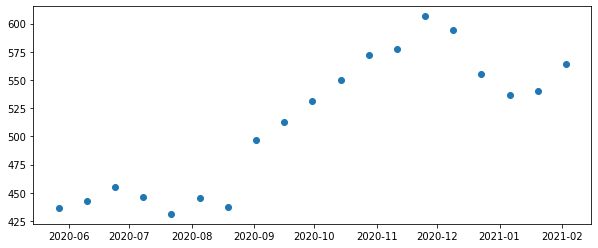

In [306]:
plt.figure(figsize=(10,4))
plt.plot_date(x=np.array(date),y=np.array(close_price_mean))

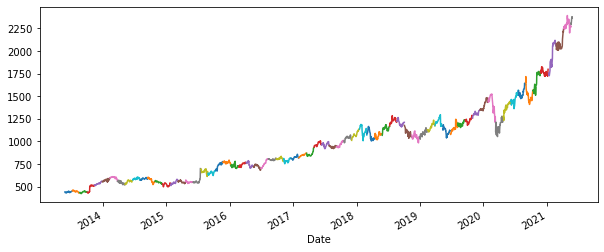

In [307]:
#checking month wise trend
for i in range(0,len(stocks.Close),30):
     stocks.Close[i:i+30].plot(figsize=(10,4))

In [860]:
df.drop('Date',inplace=True,axis=1)

In [456]:
df[2014:2016]

array([[0.9867957 , 0.9788394 , 0.99621395, 0.99367665, 0.99367665,
        0.02707111],
       [0.99824657, 0.97886939, 0.9909884 , 0.98472229, 0.98472229,
        0.05719821]])

In [861]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=scaler.fit_transform(df)

In [862]:
training_data=df[0:1613]
test_data=df[1553:2016]

In [311]:
#stocks.iloc[1613,3]

1239.849976

In [312]:
#stocks.iloc[1613,3]
#training_data=df[0:1613]
#test_data=df[1613:]

1239.849976

In [863]:
print(training_data.shape,test_data.shape)

(1613, 6) (463, 6)


In [864]:
train_x=[]
train_y=[]
for i in range(0,1613-60):
    train_x.append(training_data[i:i+60,0:6])
    train_y.append(training_data[i+60,0:6])
train_x=np.array(train_x)
train_y=np.array(train_y)

In [315]:
print(train_x.shape,train_y.shape)

(1553, 60, 6) (1553, 6)


In [333]:
test_x=[]
test_y=[]
for i in range(0,463-60):
    test_x.append(test_data[i:i+60,0:6])
    test_y.append(test_data[i+60,0:6])
test_x=np.array(test_x)
test_y=np.array(test_y)

In [334]:
print(test_x.shape,test_y.shape)

(403, 60, 6) (403, 6)


In [865]:
#preparing train data
train_x=[]
train_y=[]
for i in range(60,1613):
    train_x.append(training_data[i-60:i,0:6])
    train_y.append(training_data[i,0:6])
train_x=np.array(train_x)
train_y=np.array(train_y)

In [866]:
print(train_x.shape,train_y.shape)

(1553, 60, 6) (1553, 6)


In [867]:
#preparing test data
test_x=[]
test_y=[]
for i in range(60,463):
    test_x.append(test_data[i-60:i,0:6])
    test_y.append(test_data[i,0:6])
test_x=np.array(test_x)
test_y=np.array(test_y)

In [868]:
print(test_x.shape,test_y.shape)

(403, 60, 6) (403, 6)


In [869]:
model=Sequential()
model.add(LSTM(units=50,input_shape=(train_x.shape[1],train_x.shape[2]),activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(6))

In [870]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 50)                11400     
_________________________________________________________________
dropout_39 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 306       
Total params: 11,706
Trainable params: 11,706
Non-trainable params: 0
_________________________________________________________________


In [871]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam()
model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mse'])

In [872]:
model.fit(train_x,train_y,epochs=50,verbose=1,batch_size=100)

Epoch 1/50
16/16 [==============================] - 0s 28ms/step - loss: 0.0292 - mse: 0.0292
Epoch 2/50
16/16 [==============================] - 0s 27ms/step - loss: 0.0092 - mse: 0.0092
Epoch 3/50
16/16 [==============================] - 0s 28ms/step - loss: 0.0043 - mse: 0.0043
Epoch 4/50
16/16 [==============================] - 0s 28ms/step - loss: 0.0035 - mse: 0.0035
Epoch 5/50
16/16 [==============================] - 0s 28ms/step - loss: 0.0028 - mse: 0.0028
Epoch 6/50
16/16 [==============================] - 0s 29ms/step - loss: 0.0025 - mse: 0.0025
Epoch 7/50
16/16 [==============================] - 0s 27ms/step - loss: 0.0024 - mse: 0.0024
Epoch 8/50
16/16 [==============================] - 0s 27ms/step - loss: 0.0022 - mse: 0.0022
Epoch 9/50
16/16 [==============================] - 0s 27ms/step - loss: 0.0021 - mse: 0.0021
Epoch 10/50
16/16 [==============================] - 0s 26ms/step - loss: 0.0018 - mse: 0.0018
Epoch 11/50
16/16 [==============================] - 0s 29m

In [884]:
model.save("COMMODITY_PRICE.h5")

In [793]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('COMMODITYPRICE.h5')
# summarize model.
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 50)                11400     
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 6)                 306       
Total params: 11,706
Trainable params: 11,706
Non-trainable params: 0
_________________________________________________________________


In [873]:
predictions=model.predict(test_x)

In [874]:
predictions=scaler.inverse_transform(predictions)

In [875]:
test_y=scaler.inverse_transform(test_y)

In [876]:
from sklearn.metrics import r2_score,mean_squared_error
print("RMSE :{} MSE :{} R2_SCORE :{}".format(mt.sqrt(mean_squared_error(test_y[:,3],predictions[:,3])),mean_squared_error(test_y[:,3],predictions[:,3]),r2_score(test_y[:,3],predictions[:,3])))
    

RMSE :51.681654408034454 MSE :2670.993402351507 R2_SCORE :0.9755732171159766


In [877]:
dict={"test_y":test_y[:,3],"pred_y":predictions[:,3]}
results=pd.DataFrame(dict)

In [878]:
results.head(10)

,test_y,pred_y
0,1241.199951,1230.883179
1,1257.630005,1232.702637
2,1259.109985,1235.374146
3,1264.300049,1239.315308
4,1288.979980,1242.683594
5,1260.660034,1249.957153
6,1260.699951,1252.404053
7,1258.800049,1252.695068
8,1272.250000,1253.165283
9,1289.609985,1255.440796


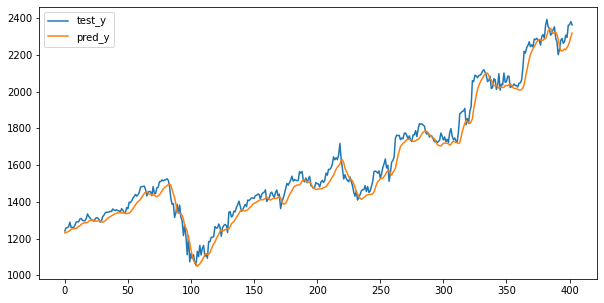

In [879]:
results.test_y.plot(figsize=(10,5))
results.pred_y.plot(figsize=(10,5))
plt.legend(['test_y','pred_y'])

In [655]:
test_x.shape

(403, 60, 6)

In [880]:
#new predictions
list=[]
list.append(test_data[403:463,:])
list=np.array(list)
new_pred=model.predict(list)
new_pred=scaler.inverse_transform(new_pred)
print(new_pred[0,3])

2334.038


In [881]:
print(new_pred[0,3])

2334.038


In [882]:
test__data=test_data.copy()
final_pred=[]
for i in range(1,6):
    l=[]
    l.append(test__data[402+i:462+i,:])
    l=np.array(l)
    new_pred=model.predict(l)
    test__data=test__data.tolist()
    test__data.append(new_pred[0,0:6])
    test__data=np.array(test__data)
    new_pred=scaler.inverse_transform(new_pred)
    final_pred.append(new_pred[0,3])

In [883]:
#new predictions for next 5 days
final_pred

[2334.038, 2357.7966, 2381.955, 2407.4421, 2434.2373]

In [1]:
#import pickle
#import joblib
#filename = 'MODEL.sav'
#joblib.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
#loaded_model = joblib.load(open(filename, 'rb'))